In [3]:
using AutomotiveDrivingModels
using AutoViz

push!(LOAD_PATH, "../../src")
include("../../src/evaluation/simulation.jl")
include("../../src/utils/automotive.jl")
include("../../src/evaluation/dataset_extraction.jl");

In [9]:
context = IntegratedContinuous(.1, 1)
num_veh = 2
models = Dict{Int, DriverModel}()
mlon = StaticLongitudinalDriver(0.)
models[1] = Tim2DDriver(context, mlon = mlon)
models[2] = Tim2DDriver(context, mlon = mlon)
roadway = gen_straight_roadway(1, 50.)
scene = Scene(num_veh)
road_idx = RoadIndex(proj(VecSE2(0.0, 0.0, 0.0), roadway))
road_pos = 10.
base_speed = 1.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_state = move_along(veh_state, roadway, road_pos)
veh_def = VehicleDef(1, AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def))
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_def = VehicleDef(2, AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def))
rec = SceneRecord(500, .1, num_veh)
T = 1.
simulate!(scene, models, roadway, rec, T)

targets = Array{Float64}(2, 2)
veh_idx = 1
t_idx = 1
extract_vehicle_frame_targets!(rec, roadway, targets, veh_idx, t_idx, 0)
veh_idx = 2
t_idx = 2
extract_vehicle_frame_targets!(rec, roadway, targets, veh_idx, t_idx, 0)

scene[2].state = VehicleState(Frenet(road_idx, roadway), roadway, 10.)
simulate!(scene, models, roadway, rec, T)
render(scene, roadway, cam=FitToContentCamera())
in_collision = convert(Float64, get(IS_COLLIDING, rec, roadway, 1, 0))

1.0

In [24]:
# add three vehicles and specifically check neighbor features
    context = IntegratedContinuous(.1, 1)
    num_veh = 3
    # one lane roadway
    roadway = gen_straight_roadway(1, 100.)
    scene = Scene(num_veh)

    models = Dict{Int, DriverModel}()

    # 1: first vehicle, moving the fastest
    mlon = StaticLongitudinalDriver(2.)
    models[1] = Tim2DDriver(context, mlon = mlon)
    road_idx = RoadIndex(proj(VecSE2(0.0, 0.0, 0.0), roadway))
    base_speed = 2.
    veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
    veh_def = VehicleDef(1, AgentClass.CAR, 5., 2.)
    push!(scene, Vehicle(veh_state, veh_def))

    # 2: second vehicle, in the middle, moving at intermediate speed
    mlon = StaticLongitudinalDriver(1.)
    models[2] = Tim2DDriver(context, mlon = mlon)
    base_speed = 1.
    road_pos = 10.
    veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
    veh_state = move_along(veh_state, roadway, road_pos)
    veh_def = VehicleDef(2, AgentClass.CAR, 5., 2.)
    push!(scene, Vehicle(veh_state, veh_def))

    # 3: thrid vehicle, in the front, not moving
    mlon = StaticLongitudinalDriver(0.)
    models[3] = Tim2DDriver(context, mlon = mlon)
    base_speed = 0.
    road_pos = 20.
    veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
    veh_state = move_along(veh_state, roadway, road_pos)
    veh_def = VehicleDef(3, AgentClass.CAR, 5., 2.)
    push!(scene, Vehicle(veh_state, veh_def))

    # simulate the scene for 1 second
    rec = SceneRecord(500, .1, num_veh)
    T = 1.
#     simulate!(scene, models, roadway, rec, T)

1.0

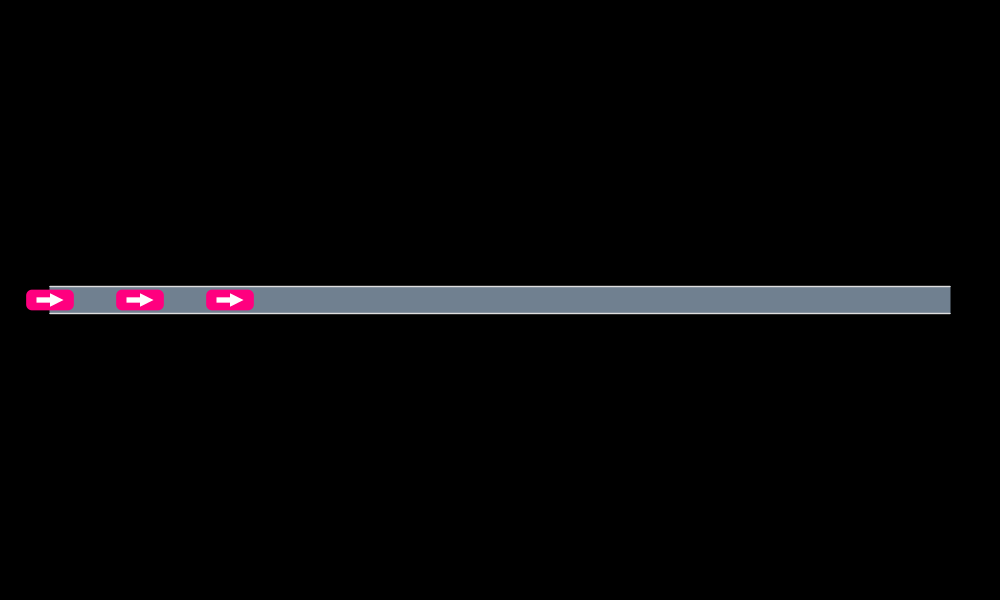

In [25]:
render(scene, roadway, cam=FitToContentCamera())

In [26]:
fore_M_ = get_neighbor_fore_along_lane(scene, 1, roadway)

AutomotiveDrivingModels.AutoCore.NeighborLongitudinalResult(2,10.0)

In [27]:
F = VehicleTargetPointFront()
R = VehicleTargetPointRear()
fore_M = get_neighbor_fore_along_lane(scene, 1, roadway, F, R, F)

AutomotiveDrivingModels.AutoCore.NeighborLongitudinalResult(2,5.0)